# Pandas 3: Grouping

In [2]:
import pandas as pd
import numpy as np
from pydataset import data
from matplotlib import pyplot as plt

## Problem 1

### Iris Dataset

In [3]:
iris=data("iris")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
species = iris.groupby("Species")
list(species.groups)

['setosa', 'versicolor', 'virginica']

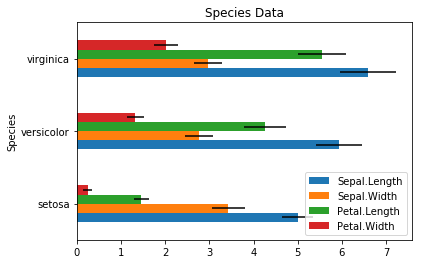

In [5]:
species.mean().plot(kind="barh", xerr=species.std(), title=r"Species Data")

#### Question 1
It is easiest to distinguish Setosa from others because sepal width and petal width ranges are significantly different from others.

#### Question 2
Based on the standard deviations, it seems like using Petal length as the basis for identifying the flower's species would be the best. 

## Poisons Dataset

In [6]:
poisons = data("poisons")
#data("poisons", show_doc=True)

In [7]:
poisons.head()

,time,poison,treat
1,0.31,1,A
2,0.45,1,A
3,0.46,1,A
4,0.43,1,A
5,0.36,2,A


Text(0, 0.5, 'Poison Type')

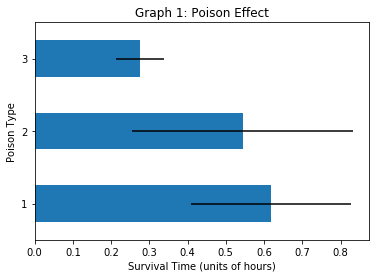

In [8]:
poison = poisons.groupby("poison")
poison['time'].mean().plot(kind="barh", xerr=poison.std(), title=r"Graph 1: Poison Effect")
plt.xlabel("Survival Time (units of hours)")
plt.ylabel("Poison Type")

Text(0, 0.5, 'Treatment Type')

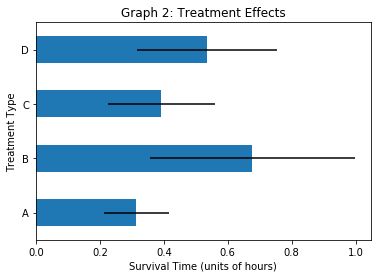

In [9]:
treatment = poisons.groupby("treat")
treatment['time'].mean().plot(kind="barh", xerr=treatment.std(), title=r"Graph 2: Treatment Effects")
plt.xlabel("Survival Time (units of hours)")
plt.ylabel("Treatment Type")

Text(0, 0.5, '(Poison Type, Treatment Type)')

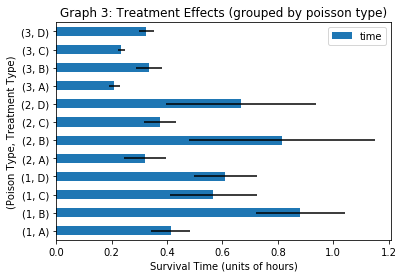

In [10]:
treatment_poison = poisons.groupby(["poison", "treat"])
treatment_poison.mean().plot(kind="barh", xerr=treatment_poison.std(), title=r"Graph 3: Treatment Effects (grouped by poisson type)")
plt.xlabel("Survival Time (units of hours)")
plt.ylabel("(Poison Type, Treatment Type)")

#### Question 1
Given the high standard deviation, it is unclear which poison is most deadly. However, based on mean statistics, it seems like Poison Type A is most deadly from graph 1. In terms of treatment effect, treatment B is most effective from graph 2.

#### Question 2
If I didn't know which poison poisoned me, I would use treatment B because it is most effective in general. If I did know which poison it was, I would choose my treatment based on graph 3.

## Diamonds Dataset

In [11]:
diamonds = data("diamonds")
#data("diamonds", show_doc=True)

In [12]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0.5, 1.0, 'Graph 1: Effect of Color and Cut of Diamond on Price')

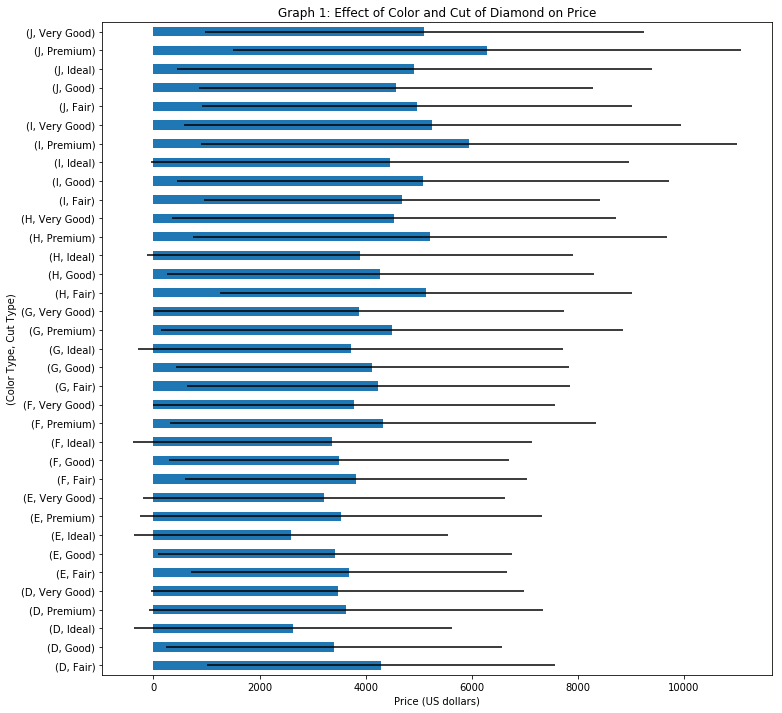

In [13]:
color_cut = diamonds.groupby(["color", "cut"])
fig = plt.figure(figsize=(12,12))
color_cut['price'].mean().plot(kind="barh", xerr=color_cut.std())
plt.xlabel("Price (US dollars)")
plt.ylabel("(Color Type, Cut Type)")
plt.title(r"Graph 1: Effect of Color and Cut of Diamond on Price")

In [14]:
H_Fair = color_cut.get_group(('H', "Fair"))
H_Fair.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
129,0.91,Fair,H,SI2,64.4,57.0,2763,6.11,6.09,3.93
130,0.91,Fair,H,SI2,65.7,60.0,2763,6.03,5.99,3.95
205,0.98,Fair,H,SI2,67.9,60.0,2777,6.05,5.97,4.08
473,1.00,Fair,H,SI2,65.3,62.0,2818,6.34,6.12,4.08
515,0.90,Fair,H,SI2,65.8,54.0,2823,6.05,5.98,3.96


Text(0, 0.5, 'Clarity Type')

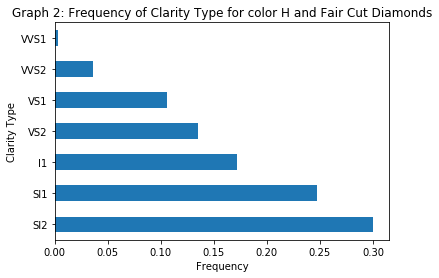

In [15]:
H_Fair_counts = H_Fair['clarity'].value_counts() / H_Fair['clarity'].value_counts().sum()
H_Fair_counts.plot(kind="barh", y="clarity", title=r"Graph 2: Frequency of Clarity Type for color H and Fair Cut Diamonds")
plt.xlabel("Frequency")
plt.ylabel("Clarity Type")

In [16]:
H_Ideal = color_cut.get_group(('H', "Ideal"))
H_Ideal.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
131,0.77,Ideal,H,VS2,62.0,56.0,2763,5.89,5.86,3.64
139,0.76,Ideal,H,SI1,61.2,57.0,2765,5.88,5.91,3.61
217,0.77,Ideal,H,SI1,62.2,56.0,2781,5.83,5.88,3.64
218,0.78,Ideal,H,SI1,61.2,56.0,2781,5.92,5.99,3.64
275,0.73,Ideal,H,VS2,62.7,55.0,2793,5.72,5.76,3.60


Text(0, 0.5, 'Clarity Type')

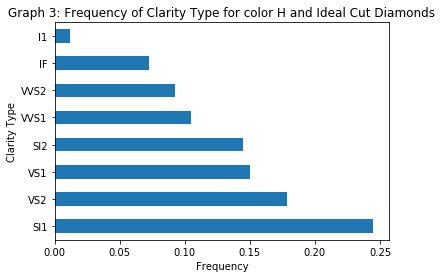

In [17]:
H_Ideal_counts = H_Ideal['clarity'].value_counts() / H_Ideal['clarity'].value_counts().sum()
H_Ideal_counts.plot(kind="barh", y="clarity", title=r"Graph 3: Frequency of Clarity Type for color H and Ideal Cut Diamonds")
plt.xlabel("Frequency")
plt.ylabel("Clarity Type")

In [18]:
H_Fair_carat = H_Fair['carat'].mean()
H_Ideal_carat = H_Ideal['carat'].mean()
print("Carrot Counts:")
print("Color H, Fair Cut diamonds carrot count: ", H_Fair_carat)
print("Color H, Ideal Cut diamonds carrot count: ", H_Ideal_carat)

Carrot Counts:
Color H, Fair Cut diamonds carrot count:  1.2191749174917463
Color H, Ideal Cut diamonds carrot count:  0.7995248796147678


#### Question 1
Based on graph 1, it is hard ot say if the color and cut of diamond affect its price because of high standard deviation. 

#### Question 2
Graph 2 and Graph 3 shows the difference in frequency of cut type between Fair cut sell and Ideal cut sell. We see that Fair cut diamonds have more worse quality cut types as expected. Therefore, these graphs do not explain the unintuitive statistics. However, we see that Fair cuts diamonds are sold with higher carots, which could explain this unituitive statistics. 

## Problem 2

In [73]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Question 1

In [106]:
titanic.pivot_table(values="Survived", index=["Embarked"], aggfunc="mean", fill_value='-')

,Survived
Embarked,
C,0.555556
Q,0.357724
S,0.332604


### Question 2

In [104]:
titanic.pivot_table(values="Survived", index=["Embarked"], columns=["Sex"], \
                   aggfunc="mean", fill_value='-')

Sex,female,male
Embarked,,
C,0.902655,0.305732
Q,0.616667,0.111111
S,0.680412,0.170144


### Question 3

The table shows us that people are more likely to survive when embarked from "C" = Cherbourg. Moreover, we see that females are more likely to survive. To further investigate let's do question 4.

### Question 4

In [116]:
titanic.pivot_table(values="Survived", index=["Embarked"], columns=["Sex"], \
                   aggfunc="count", fill_value='-')

Sex,female,male
Embarked,,
C,113,157
Q,60,63
S,291,623


This gives us the count of people in different categories.

In [117]:
age = pd.cut(titanic['Age'], [0, 12, 18, 80])
titanic.pivot_table(values="Survived", index=["Sex", age], columns=["Embarked"], \
                   aggfunc="count", fill_value='-')

Embarked             C   Q      S
Sex    Age                       
female (0, 12]     9.0   -   35.0
       (12, 18]   15.0   6   27.0
       (18, 80]   74.0  18  202.0
male   (0, 12]     7.0   5   38.0
       (12, 18]    6.0   -   45.0
       (18, 80]  101.0  21  435.0

It seems like for males, older males tend to ride the Titanic, which could explain why females have higher survival rate.

In [118]:
age = pd.cut(titanic['Age'], [0, 12, 18, 80])
titanic.pivot_table(values="Survived", index=["Sex", age], columns=["Embarked"], \
                   aggfunc="mean", fill_value='-')

Embarked                C          Q         S
Sex    Age                                    
female (0, 12]   0.888889          -  0.542857
       (12, 18]  0.800000        0.5  0.777778
       (18, 80]  0.959459   0.444444  0.732673
male   (0, 12]   0.714286          0  0.578947
       (12, 18]  0.333333          -  0.066667
       (18, 80]  0.336634  0.0952381  0.154023

My previous conclusion is substaniated from the fact that old males have a low survival rate based on this table.

In [120]:
titanic.pivot_table(values="Survived", index=["Sex", "Pclass", age], columns=["Embarked"], \
                   aggfunc="count", fill_value='-')

Embarked                 C   Q      S
Sex    Pclass Age                    
female 1.0    (0, 12]    -   -    1.0
              (12, 18]   4   -    8.0
              (18, 80]  61   2   55.0
       2.0    (0, 12]    2   -   11.0
              (12, 18]   2   -    6.0
              (18, 80]   7   1   74.0
       3.0    (0, 12]    7   -   23.0
              (12, 18]   9   6   13.0
              (18, 80]   6  15   73.0
male   1.0    (0, 12]    1   -    3.0
              (12, 18]   3   -    1.0
              (18, 80]  59   1   83.0
       2.0    (0, 12]    1   -   10.0
              (12, 18]   -   -   10.0
              (18, 80]  12   4  121.0
       3.0    (0, 12]    5   5   25.0
              (12, 18]   3   -   34.0
              (18, 80]  30  16  231.0

It is interesting to see that most old males take the 3rd class, which might also explain why they have lower survival rates.